***
***
# 文本挖掘简介

***
***

![image.png](img/chengjun.png)

# What can be learned from 5 million books

https://www.bilibili.com/video/BV1jJ411u7Nd

This talk by Jean-Baptiste Michel and Erez Lieberman Aiden is phenomenal. 


Michel, J.-B., et al. (2011). Quantitative Analysis of Culture Using Millions of Digitized Books. Science, 331, 176–182.

In [59]:
%%html 

<iframe src="//player.bilibili.com/player.html?aid=68934891&bvid=BV1jJ411u7Nd&cid=119471774&page=1" 
width=1000 height=600
scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true"> </iframe>


![](img/books.jpg)


Relative Frequency or Usage frequency is computed by dividing the number of instances of the n-gram in a given year by the total number of words in the corpus in that year. 

For instance, in 1861, the 1-gram “slavery” appeared in the corpus 21,460 times, on 11,687 pages of 1208 books. The corpus contains 386,434,758 words from 1861; thus, the frequency is $5.5 × 10^{−5}$. 

In [3]:
21460/386434758

5.553330686676999e-05

试一下谷歌图书的数据: https://books.google.com/ngrams/   
- 一个玩得停不下来的Google神器：Ngram https://www.douban.com/group/topic/221830241/

- What does the Ngram Viewer do?
https://books.google.com/ngrams/info


## File format: 

数据下载： https://storage.googleapis.com/books/ngrams/books/datasetsv3.html

Each of the files below is compressed tab-separated data. 

ngram year match_count volume_count

> circumvallate   1979   261    91

This line tells us that in 1978, the word "circumvallate" occurred 335 times overall, in 91 distinct books of our sample.

The format of the `total_counts` files are similar, except that the ngram field is absent and there is one triplet of values (match_count, page_count, volume_count) per year.



<img src=img/storyw.png width = 500px>

Storywrangler: A massive exploratorium for sociolinguistic, cultural, socioeconomic, and political timelines using Twitter https://advances.sciencemag.org/content/7/29/eabe6534.abstract

The dataset is openly available through an interactive time series viewer (https://storywrangling.org) and downloadable through our API (https://gitlab.com/compstorylab/storywrangler). 

A Python package for generating arbitrary contagiograms along with further examples at https://gitlab.com/compstorylab/contagiograms . 

https://storywrangling.org/ngrams?ngrams=fake%20news,Trump,big%20data,machine%20learning&language=en&rt=true&scale=log&metric=freq&start=2007-11-07&end=2023-05-21

#  Bag-of-words model （BOW)

Represent text as numerical feature vectors

- We create a vocabulary of unique tokens—for example, words—from the entire set of documents.
- We construct a feature vector from each document that contains the counts of how often each word occurs in the particular document.

Since the unique words in each document represent only a small subset of all the
words in the bag-of-words vocabulary, the feature vectors will consist of mostly
zeros, which is why we call them sparse

![image.png](img/txt.png)

“词袋模型”（Bag of words model）假定对于一个文本：
- 忽略词序、语法、句法；
- 将其仅仅看做是一个词集合或组合；
- 每个词的出现都是独立的，不依赖于其他词是否出现。
    - 文本任意一个位置出现某一个词汇是独立选择的，不受前面句子的影响。

这种假设虽然对自然语言进行了简化，便于模型化。

Document-Term Matrix (DTM)


问题：例如在新闻个性化推荐中，用户对“南京醉酒驾车事故”这个短语很感兴趣。词袋模型忽略了顺序和句法，认为用户对“南京”、“醉酒”、“驾车”和“事故”感兴趣，因此可能推荐出和“南京”、“公交车”、“事故”相关的新闻。

解决方法: 可抽取出整个短语；或者采用高阶（2阶以上）统计语言模型。例如bigram、trigram来将词序保留下来，相当于bag of bigram和bag of trigram。

# Transforming words into feature vectors

A document-term matrix or term-document matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. 

In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. 

There are various schemes for determining the value that each entry in the matrix should take. One such scheme is tf-idf. They are useful in the field of natural language processing.

D1 = "I like databases"

D2 = "I hate databases"

|          |  I        |    like   |hate        | databases   |
| -------------|:-------------:|:-------------:|:-------------:|-----:|
| D1| 1| 1 | 0 |1|
| D2| 1| 0 | 1 |1|

In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
docs = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining and the weather is sweet'])
bag = count.fit_transform(docs)

In [3]:
count.get_feature_names()

['and', 'is', 'shining', 'sun', 'sweet', 'the', 'weather']

In [5]:
print(count.vocabulary_) # word: position index

{'the': 5, 'sun': 3, 'is': 1, 'shining': 2, 'weather': 6, 'sweet': 4, 'and': 0}


In [6]:
type(bag) 

scipy.sparse.csr.csr_matrix

In [7]:
print(bag.toarray())

[[0 1 1 1 0 1 0]
 [0 1 0 0 1 1 1]
 [1 2 1 1 1 2 1]]


In [8]:
import pandas as pd
pd.DataFrame(bag.toarray(), columns = count.get_feature_names())

and  is  shining  sun  sweet  the  weather
0    0   1        1    1      0    1        0
1    0   1        0    0      1    1        1
2    1   2        1    1      1    2        1

The sequence of items in the bag-of-words model that we just created is also called the 1-gram or unigram model: each item or token in the vocabulary represents a single word. 

### n-gram model
The choice of the number n in the n-gram model depends on the particular application

- 1-gram: "the", "sun", "is", "shining"
- 2-gram: "the sun", "sun is", "is shining" 

The CountVectorizer class in scikit-learn allows us to use different
n-gram models via its `ngram_range` parameter. 

While a 1-gram
representation is used by default

we could switch to a 2-gram
representation by initializing a new CountVectorizer instance with
ngram_range=(2,2).

## TF-IDF
Assessing word relevancy via term frequency-inverse document frequency

$$tf*idf(t, d) = tf(t, d) \times idf(t)$$

- $tf(t, d)$ is the term frequency of term t in document d.
- inverse document frequency $idf(t)$ can be calculated as: $idf(t) = log \frac{n_d}{1 + df(d, t)}$



Question: Why do we add the constant 1 to the denominator ?
![image.png](img/txt1.png)

The tf-idf equation that was implemented in scikit-learn is as follows: $tf*idf(t, d) = tf(t, d) \times （idf(t, d) + 1）$
 
[SKlearn use `smooth_idf=True`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer) $idf(t) = log \frac{1+n_d}{1 + df(d, t)} + 1$

where $n_d$ is the total number of documents, and $df(d, t)$ is the number of documents $d$ that contain the term $t$. 


 
### L2-normalization

$$l2_{x} = \frac{x} {\sqrt{\sum {x^2}}}$$



课堂作业：请根据公式计算'is'这个词在文本2中的tfidf数值？

![](./img/ask.jpeg)

### TfidfTransformer
Scikit-learn implements yet another transformer, the TfidfTransformer, that
takes the raw term frequencies from CountVectorizer as input and transforms
them into tf-idfs:

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())


[[0.   0.43 0.56 0.56 0.   0.43 0.  ]
 [0.   0.43 0.   0.   0.56 0.43 0.56]
 [0.4  0.48 0.31 0.31 0.31 0.48 0.31]]


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm=None, smooth_idf=True)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())


[[0.   1.   1.29 1.29 0.   1.   0.  ]
 [0.   1.   0.   0.   1.29 1.   1.29]
 [1.69 2.   1.29 1.29 1.29 2.   1.29]]


In [11]:
import pandas as pd
bag = tfidf.fit_transform(count.fit_transform(docs))
pd.DataFrame(bag.toarray(), columns = count.get_feature_names())

and   is   shining       sun     sweet  the   weather
0  0.000000  1.0  1.287682  1.287682  0.000000  1.0  0.000000
1  0.000000  1.0  0.000000  0.000000  1.287682  1.0  1.287682
2  1.693147  2.0  1.287682  1.287682  1.287682  2.0  1.287682

In [12]:
# 一个词的tfidf值
import numpy as np
tf_is = 2.0
n_docs = 3.0
# smooth_idf=True & norm = None
idf_is = np.log((1+n_docs) / (1+3)) + 1

tfidf_is = tf_is * idf_is
print('tf-idf of term "is" = %.2f' % tfidf_is)

tf-idf of term "is" = 2.00


In [13]:
# *最后一个文本*里的词的tfidf原始数值（未标准化）
tfidf = TfidfTransformer(use_idf=True, norm=None, smooth_idf=True)
raw_tfidf = tfidf.fit_transform(count.fit_transform(docs)).toarray()[-1]
raw_tfidf, count.get_feature_names()

(array([1.69, 2.  , 1.29, 1.29, 1.29, 2.  , 1.29]),
 ['and', 'is', 'shining', 'sun', 'sweet', 'the', 'weather'])

In [14]:
# l2标准化后的tfidf数值
l2_tfidf = raw_tfidf / np.sqrt(np.sum(raw_tfidf**2))
l2_tfidf 

array([0.4 , 0.48, 0.31, 0.31, 0.31, 0.48, 0.31])

# 政府工作报告文本挖掘

### 0. 读取数据

In [60]:
with open('../data/gov_reports1954-2017.txt', 'r', encoding = 'utf-8') as f:
    reports = f.readlines()

In [3]:
len(reports)

48

In [4]:
print(reports[0][:1000])

1954	1954年政府工作报告——1954年5月23日在中华人民共和国第一届全国人民代表大会第一次会议上　　　　　　　　　　　　　　　　　　　　　　　　  国务院总理周恩来各位代表：　　我们第一届全国人民代表大会第一次会议，在听了刘少奇同志关于宪法草案的报告并进行了三天的讨论以后，已经光荣地完成了一件历史性的工作，通过了我们国家的根本法——中华人民共和国宪法，接着，又通过了几个重要的法律。现在，我代表中央人民政府作工作报告。　　我国伟大的人民革命的根本目的，是在于从帝国主义、封建主义和官僚资本主义的压迫下面，最后也从资本主义的束缚和小生产的限制下面，解放我国的生产力，使我国国民经济能够沿着社会主义的道路而得到有计划的迅速的发展，以便提高人民的物质生活和文化生活的水平，并且巩固我们国家的独立和安全。我国的经济原来是很落后的；如果我们不建设起强大的现代化的工业、现代化的农业、现代化的交通运输业和现代化的国防，我们就不能摆脱落后和贫困，我们的革命就不能达到目的。在一九四九年至一九五二年间，中央人民政府按照中国人民政治协商会议共同纲领的规定，先后完成了全国大陆的统一，完成了土地制度的改革，进行了广泛的和深入的镇压反革命运动和各种民主改革运动，恢复了遭受长期战争破坏的国民经济，着重地发展了社会主义的国营经济和各种类型的合作社经济，初步地调整了公私营工商业之间的关系，这一切都为有计划地进行经济建设和逐步过渡到社会主义社会准备了必要的条件。随后，从一九五三年起，我国就开始了经济建设的第一个五年计划，着手有系统地逐步地实现国家的社会主义工业化和对农业、手工业和资本主义工商业的社会主义改造。经济建设工作在整个国家生活中已经居于首要的地位。　　制订第一个五年计划的全部工作现在还没有最后完成，对于计划的许多细节还在进行补充和修订。第一个五年计划的方针是大家已经知道的，这就是：集中主要力量发展重工业，建立国家工业化和国防现代化的基础；相应地发展交通运输业、轻工业、农业和商业；相应地培养建设人才；有步骤地促进农业、手工业的合作化；继续进行对资本主义工商业的改造；保证国民经济中社会主义成份的比重稳步增长，同时正确地发挥个体农业、手工业和资本主义工商业的作用；保证在发展生产的基础上逐步提高人民物质生活和文化生活的水平。第一个五年计划所以要集中主要力量发展重工业，即冶金工业、燃料工业、动力工业、

In [5]:
print(reports[4][:500])

1959						1959年国务院政府工作报告	——1959年4月18日在第二届全国人民代表大会第一次会议上	　　　　　　　　　　　　　　　　  国务院总理周恩来	各位代表：	　　我现在根据国务院的决定，向第二届全国人民代表大会第一次会议作政府工作报告。	　　一、第一个五年计划时期内和第二个五年计划的第一年——一九五八年的伟大成就	　　在第一届全国人民代表大会的四年多的任期中间，我们的国家经历了一系列的具有重大历史意义的变化。	　　当一九五四年第一届全国人民代表大会第一次会议召开的时候，我国社会主义经济已经在国民经济中居于主导的地位，但是，我国还存在着大量的资本主义的工业和商业，并且大量地存在着个体的农业和手工业。农村中劳动互助运动已经广泛地发展起来，参加农业劳动互助组的农户达到了百分之六十左右，但是，组成农业生产合作社的农户还只占农户总数的百分之二左右。在那时候，我国已经完成了经济恢复时期的任务，开始了大规模的、有计划的经济建设。但是，究竟我们能不能在一个较短的时间内，使我国这样一个有六亿多人口的大国，建立起社会主义工业化的基础来，还有待于事实的证明。而现在呢？大家看到，只经过四年


 pip install jieba
> https://github.com/fxsjy/jieba

 pip install wordcloud
>  https://github.com/amueller/word_cloud

 pip install gensim


In [11]:
 pip install -i https://pypi.tuna.tsinghua.edu.cn/simple jieba

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
 pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.7/158.7 KB 223.2 kB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install gensim

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sys 
import numpy as np
from collections import defaultdict
import statsmodels.api as sm
from wordcloud import WordCloud
import jieba
import matplotlib
import gensim
from gensim import corpora, models, similarities
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
#matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
matplotlib.rc("savefig", dpi=400)

In [75]:
# 为了确保中文可以在matplotlib里正确显示
#matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
# 需要确定系统安装了Microsoft YaHei

In [76]:
# import matplotlib
# my_font = matplotlib.font_manager.FontProperties(
#     fname='/Users/chengjun/github/cjc/data/msyh.ttf')

# 1. 分词

In [12]:
import jieba

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/l6/ntr5b4610hx38gy0_2xp7ngh0000gn/T/jieba.cache
Loading model cost 0.688 seconds.
Prefix dict has been built successfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


## 2. 停用词

In [21]:
filename = '../data/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line] = 1
    line = f.readline().rstrip()
f.close()


In [22]:
adding_stopwords = [u'我们', u'要', u'地', u'有', u'这', u'人',
                    u'发展',u'建设',u'加强',u'继续',u'对',u'等',
                    u'推进',u'工作',u'增加']
for s in adding_stopwords: stopwords[s]=10

## 3. 关键词抽取

### 基于TF-IDF 算法的关键词抽取

In [23]:
import jieba.analyse
txt = reports[-1]
tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)

In [24]:
u"、".join([i[0] for i in tf[:50]])

'发展、改革、推进、建设、加强、加快、推动、深化、完善、创新、就业、全面、促进、经济、政府、深入、实施、提高、企业、支持、群众、服务、坚持、人民、坚决、制度、治理、政策、农村、试点、扩大、机制、社会、落实、工作、保障、增长、国家、生态、安全、今年、稳定、继续、地区、保护、中国、合作、产能、维护、重点'

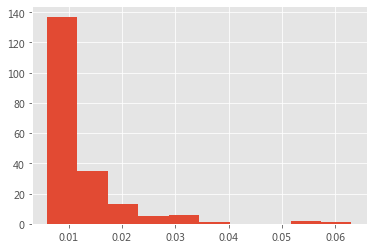

In [26]:
plt.style.use('ggplot')
plt.hist([i[1] for i in tf])
plt.show()

### 基于 TextRank 算法的关键词抽取

In [27]:
tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
u"、".join([i[0] for i in tr[:50]])

'发展、改革、推进、建设、经济、加强、推动、加快、政府、完善、创新、企业、全面、实施、促进、提高、支持、服务、政策、深入、中国、就业、国家、制度、群众、社会、人民、地区、坚持、扩大、农村、地方、保护、继续、增长、机制、工作、保障、治理、试点、合作、综合、重点、市场、投资、领域、加大、消费、制定、维护'

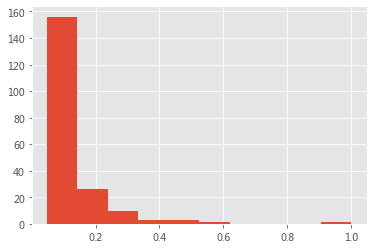

In [28]:
plt.hist([i[1] for i in tr])
plt.show()

In [29]:
import pandas as pd

def keywords(index):
    txt = reports[-index]
    tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)
    tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
    tfdata = pd.DataFrame(tf, columns=['word', 'tfidf'])
    trdata = pd.DataFrame(tr, columns=['word', 'textrank'])
    worddata = pd.merge(tfdata, trdata, on='word')
    fig = plt.figure(figsize=(16, 6),facecolor='white')
    plt.plot(worddata.tfidf, worddata.textrank, linestyle='',marker='.')
    for i in range(len(worddata.word)):
        plt.text(worddata.tfidf[i], worddata.textrank[i], worddata.word[i], 
                 fontsize = worddata.textrank[i]*30, 
                 color = 'red', rotation = 0
                )
    plt.title(txt[:4])
    plt.xlabel('Tf-Idf')
    plt.ylabel('TextRank')
    plt.show()

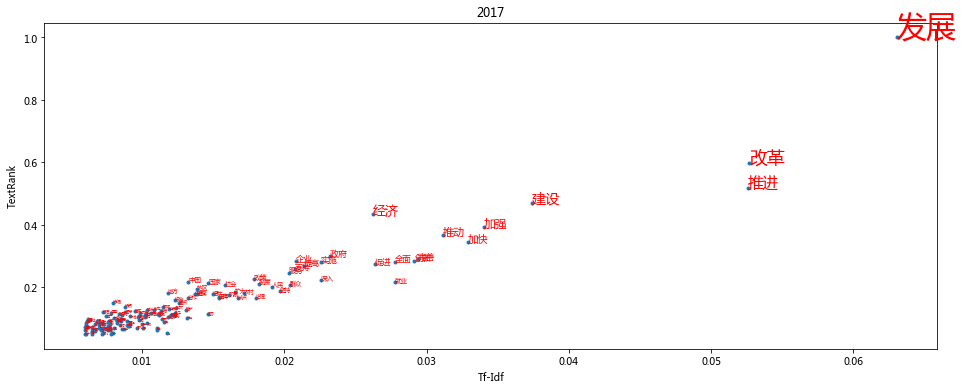

In [43]:
keywords(1)

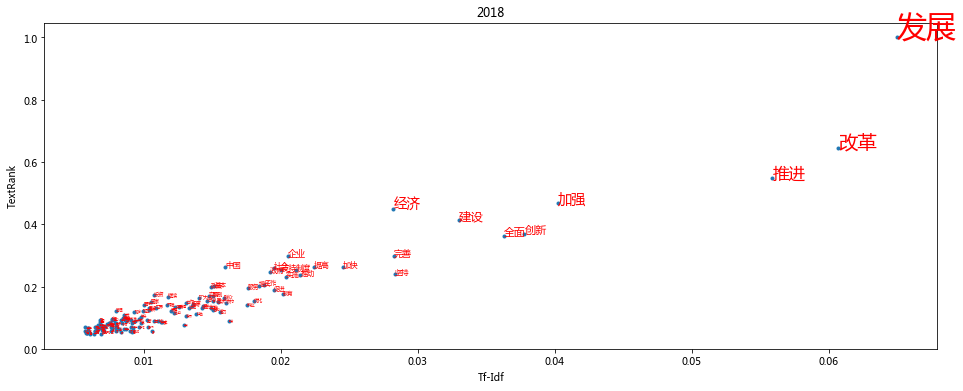

In [86]:
keywords(2)

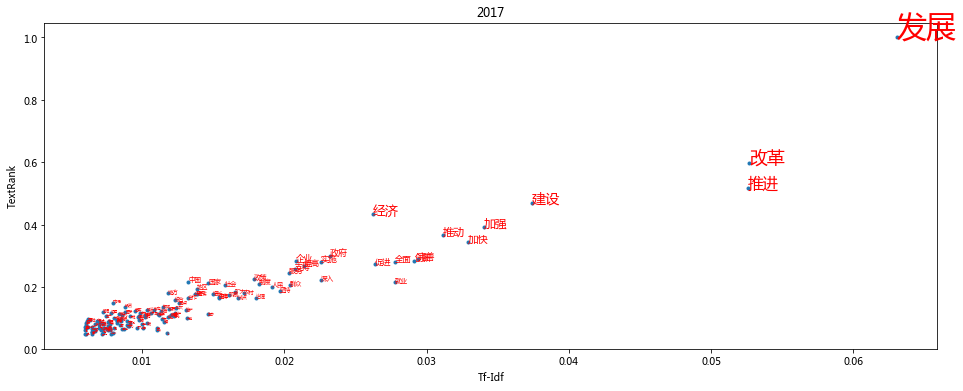

In [87]:
keywords(3)

TextRank: Bringing Order into Texts

### 基本思想:

* 将待抽取关键词的文本进行分词
* 以固定窗口大小(默认为5，通过span属性调整)，词之间的共现关系，构建图
* 计算图中节点的PageRank，注意是无向带权图

## 4. 词云

In [18]:
def wordcloudplot(txt, year):
    wordcloud = WordCloud(font_path='../data/msyh.ttf').generate(txt)
    # Open a plot of the generated image.
    fig = plt.figure(figsize=(16, 6),facecolor='white')
    plt.imshow(wordcloud)
    plt.title(year)
    plt.axis("off")
    #plt.show()

#### 基于tfidf过滤的词云

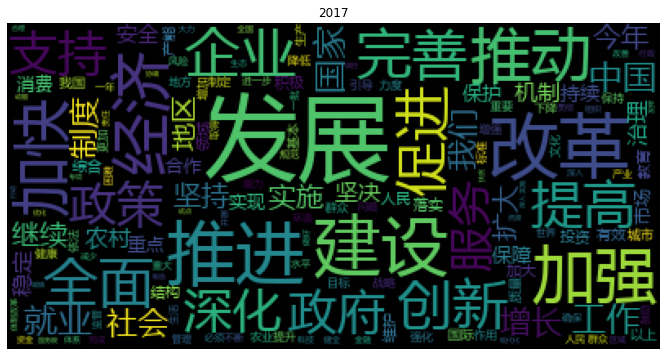

In [21]:
from jieba import analyse
txt = reports[-1]
tfidf200 = analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

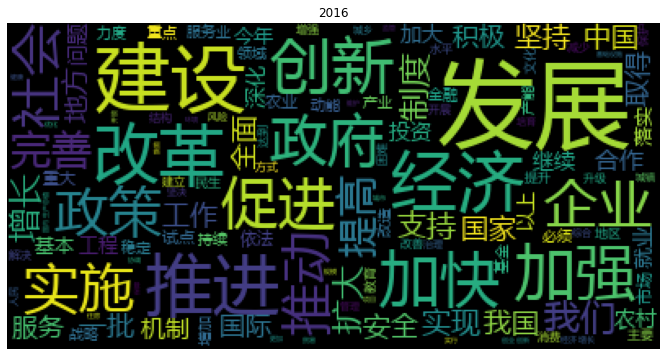

In [22]:
txt = reports[-2]
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba .cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

In [59]:
wordfreq = defaultdict(int)
for i in seg_list:
    wordfreq[i] +=1
wordfreq = [[i, wordfreq[i]] for i in wordfreq]

wordfreq.sort(key= lambda x:x[1], reverse = True )
u"、 ".join([ i[0] + u'（' + str(i[1]) +u'）' for i in wordfreq ])

'发展（125）、 改革（68）、 推进（65）、 建设（54）、 经济（52）、 加强（45）、 推动（42）、 加快（40）、 政府（36）、 创新（36）、 完善（35）、 企业（35）、 全面（35）、 促进（34）、 提高（32）、 就业（31）、 实施（31）、 中国（31）、 支持（29）、 深化（29）、 政策（28）、 服务（27）、 国家（26）、 人民（26）、 工作（26）、 制度（25）、 我们（25）、 深入（25）、 社会（25）、 增长（25）、 群众（24）、 坚持（24）、 今年（23）、 继续（23）、 地区（22）、 扩大（22）、 农村（20）、 坚决（20）、 机制（19）、 治理（19）、 稳定（19）、 地方（19）、 保障（18）、 安全（18）、 保护（18）、 持续（17）、 合作（17）、 市场（17）、 重点（17）、 实现（17）、 消费（16）、 投资（16）、 综合（16）、 落实（16）、 试点（16）、 结构（15）、 有效（15）、 维护（15）、 加大（15）、 产能（15）、 积极（15）、 领域（15）、 教育（15）、 改善（14）、 国际（14）、 国内（14）、 城市（14）、 我国（14）、 生态（14）、 以上（14）、 基本（14）、 问题（14）、 强化（13）、 增加（13）、 农业（13）、 提升（13）、 制定（13）、 力度（13）、 质量（13）、 引导（13）、 降低（13）、 依法（12）、 战略（12）、 升级（12）、 重要（12）、 标准（12）、 作用（12）、 健康（12）、 保持（12）、 增强（12）、 生产（12）、 文化（12）、 更加（12）、 必须（12）、 创业（12）、 目标（12）、 民生（12）、 下降（12）、 确保（11）、 取得（11）、 供给（11）、 生活（11）、 核心（11）、 规范（11）、 环境（11）、 收费（11）、 进一步（11）、 管理（11）、 做好（10）、 完成（10）、 资金（10）、 能力（10）、 不断（10）、 开展（10）、 产业（10）、 健全（10）、 水平（10）、 科技（10）、 体系（10）、 风险（10）、 世界（10）、 鼓励（10）、 重大（10）、 一年（10）、 监管（10

#### 基于停用词过滤的词云

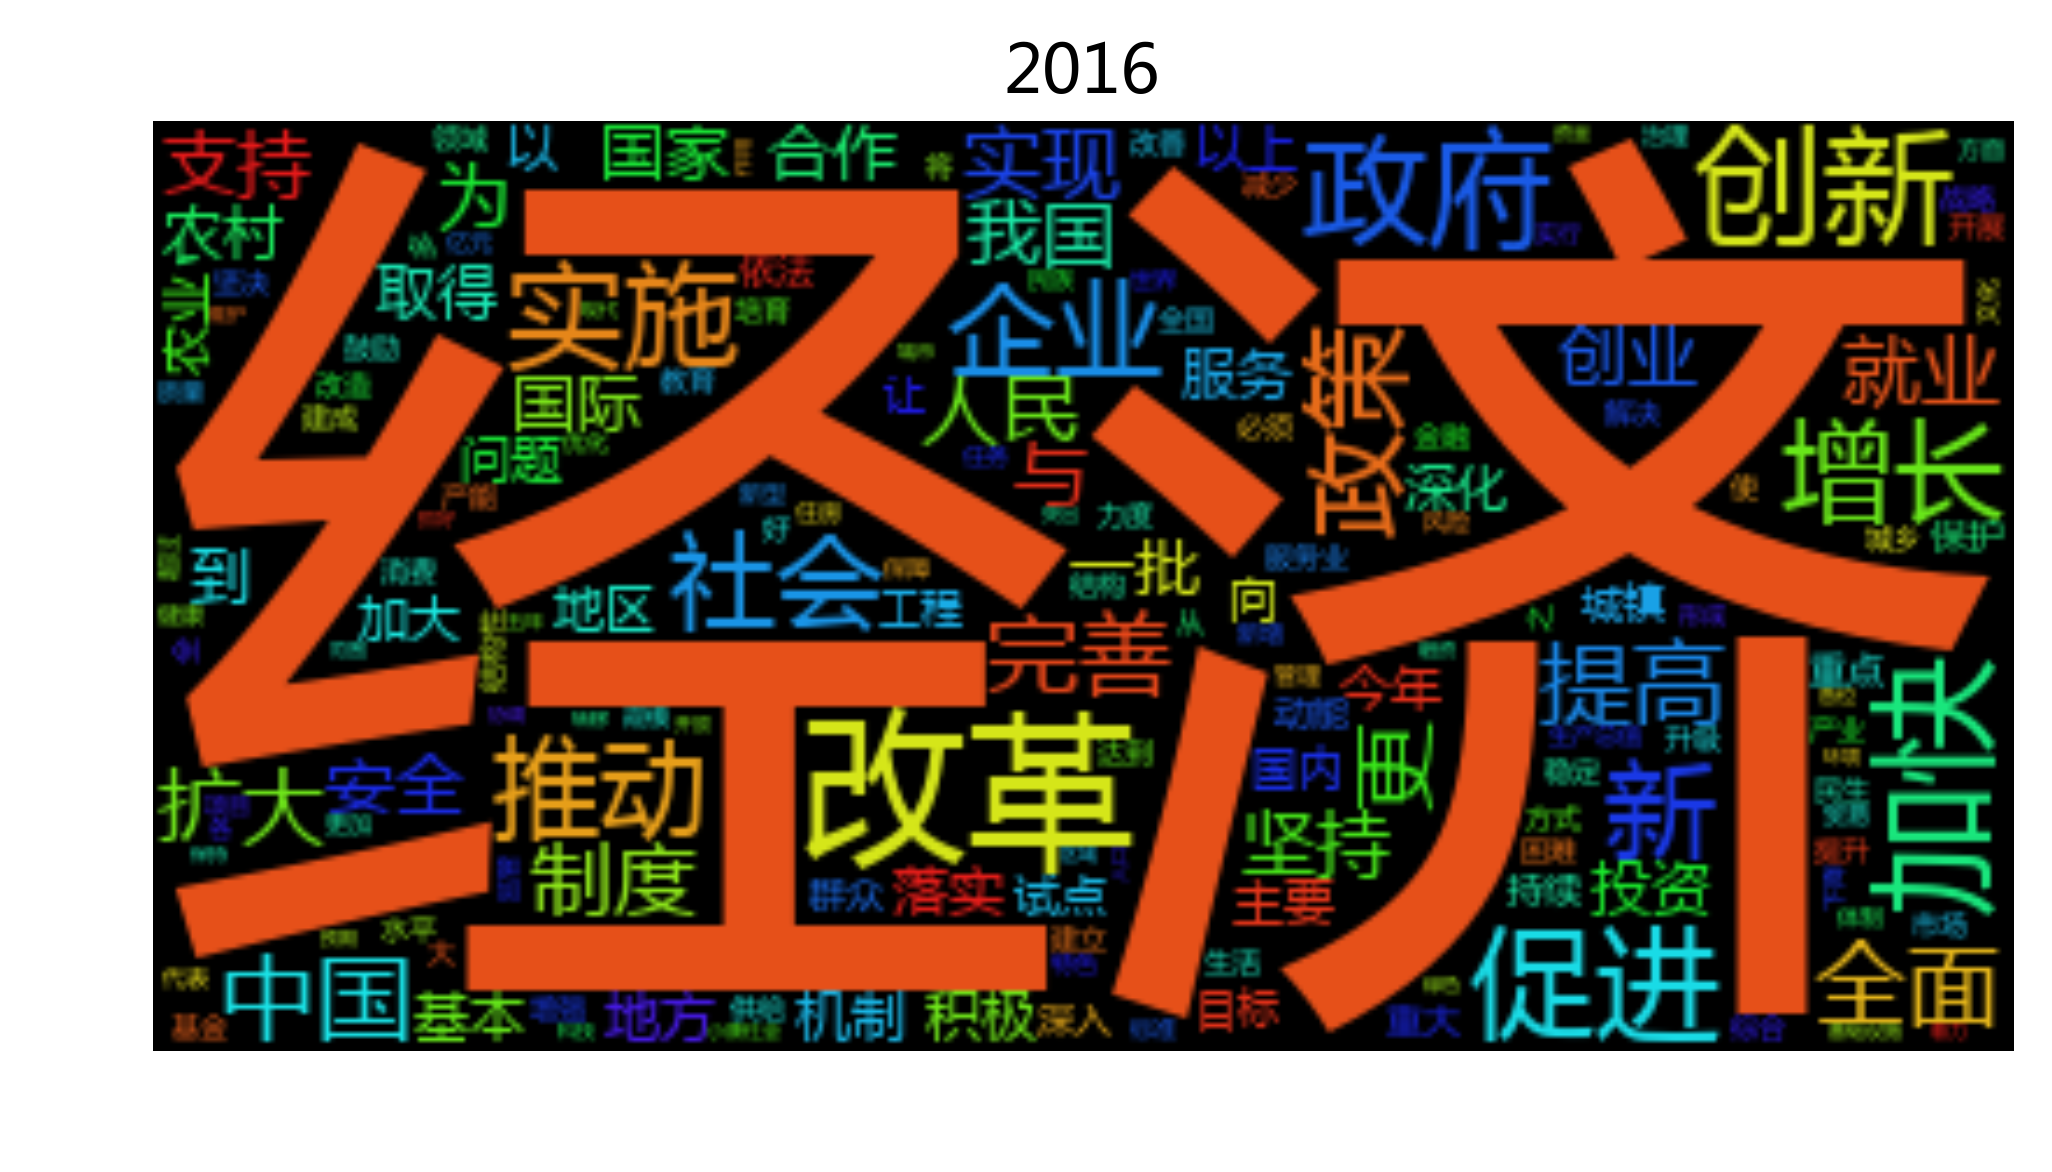

In [70]:
#jieba.add_word('股灾', freq=100, tag=None) 

txt = reports[-1]
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i not in stopwords]
txt = r' '.join(seg_list)
wordcloudplot(txt, txt[:4])  
#file_path = '/Users/chengjun/GitHub/cjc2016/figures/wordcloud-' + txt[:4] + '.png'
#plt.savefig(file_path,dpi = 300, bbox_inches="tight",transparent = True)

### 绘制1954-2016政府工作报告词云

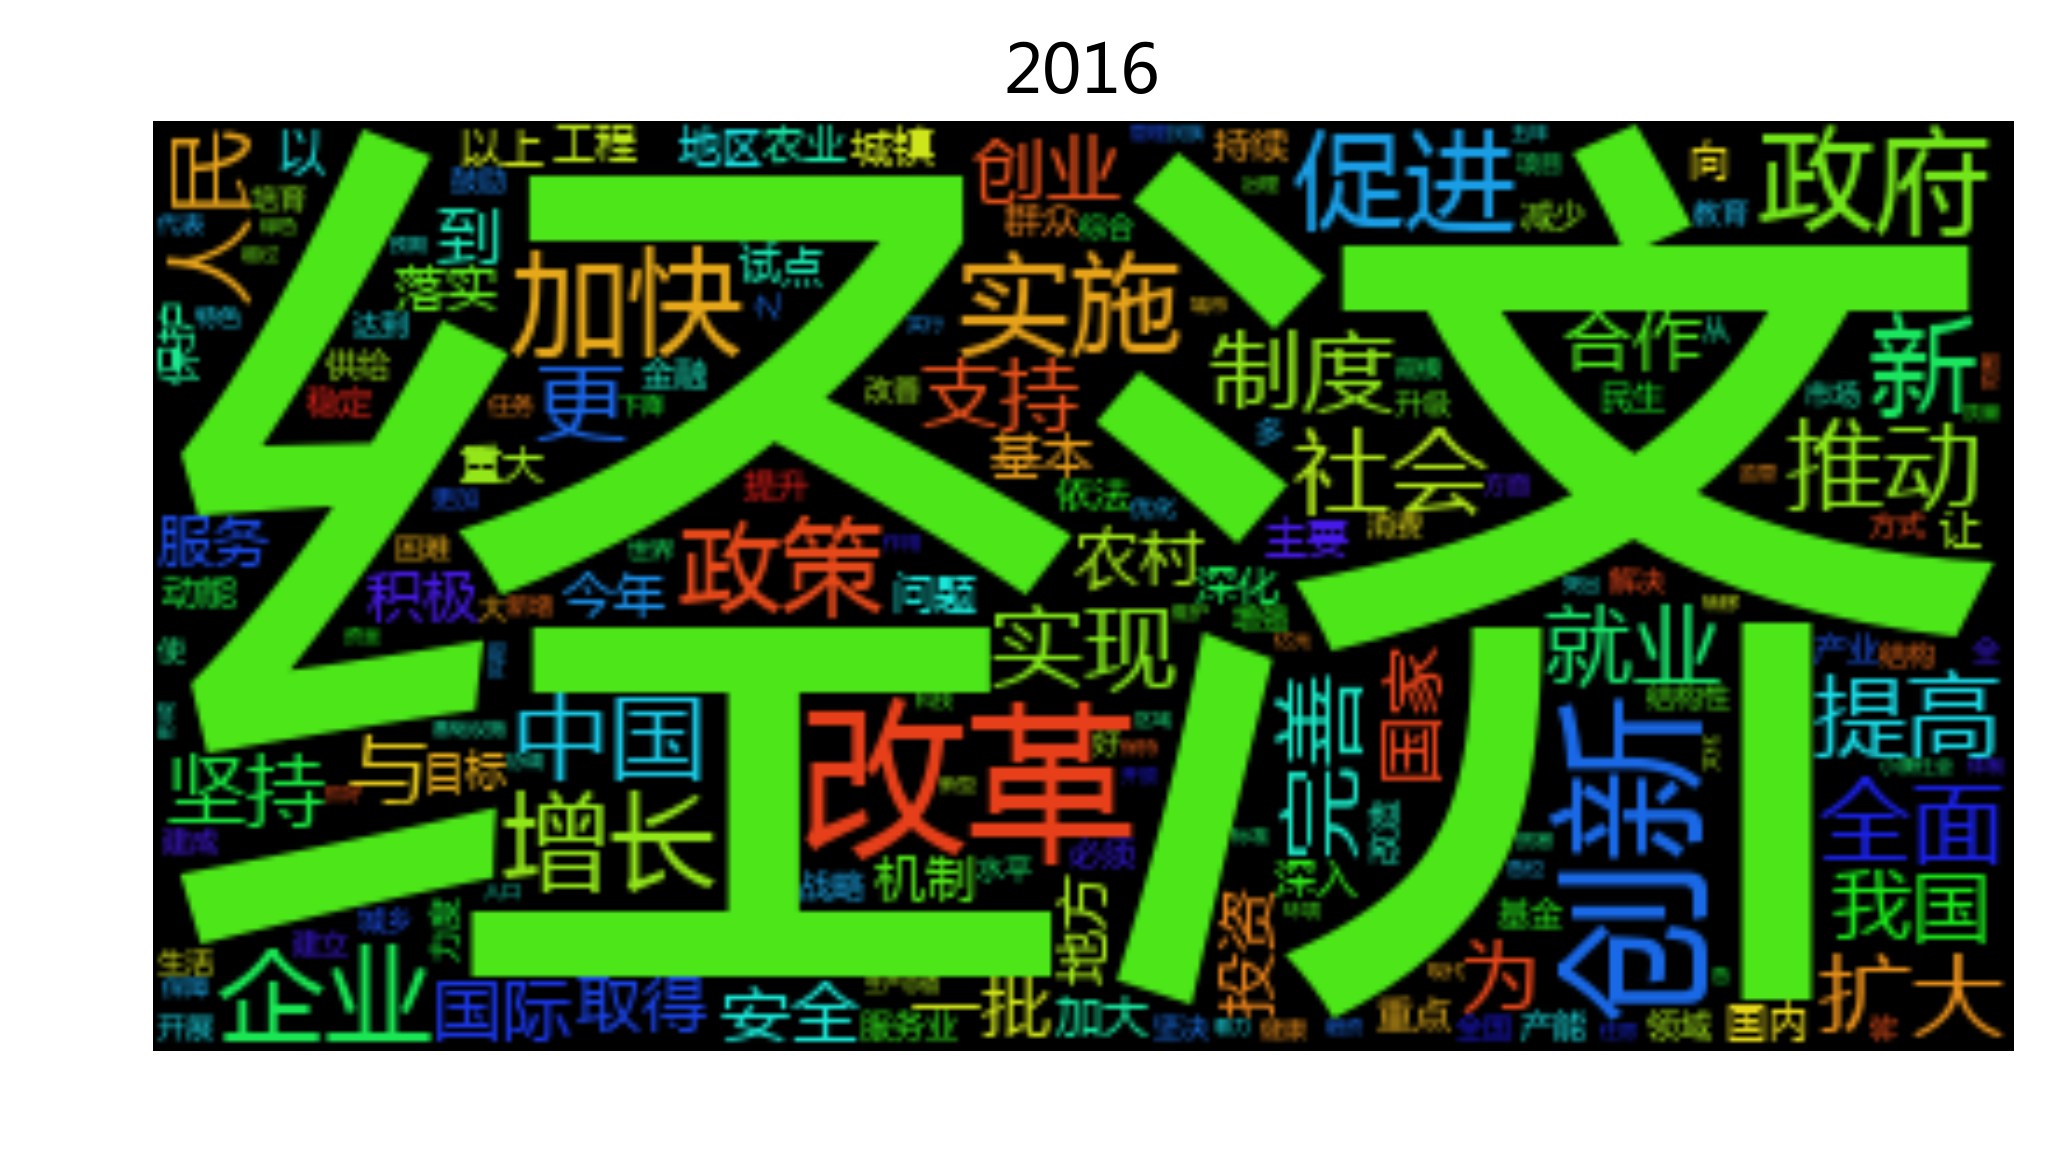

In [113]:
#jieba.add_word('股灾', freq=100, tag=None) 

for txt in reports:
    seg_list = jieba.cut(txt, cut_all=False)
    seg_list = [i for i in seg_list if i not in stopwords]
    txt = r' '.join(seg_list)
    wordcloudplot(txt, txt[:4]) 
    file_path = '../figure/wordcloud-' + txt[:4] + '.png'
    plt.savefig(file_path,dpi = 400, bbox_inches="tight",\
                transparent = True)


## 5. 词向量的时间序列

### 使用相对频数来进行计算

In [32]:
with open('../data/gov_reports1954-2017.txt', 'r', encoding = 'utf-8') as f:
    reports = f.readlines()

years = [int(i[:4]) for i in reports]


In [33]:
import jieba 

def cut_str(astr):
    seg_list = jieba.cut(astr, cut_all=False)
    return ' '.join(list(seg_list))

report_list = []
for k, i in enumerate(reports):
    report_list.append(cut_str(i))
    print(k)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


In [34]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(ngram_range=(1, 1))
docs = np.array(report_list)
bag = count.fit_transform(docs)

In [35]:
import pandas as pd
# Relative Frequency
bt = bag.toarray()
bs = np.sum(bt, axis = 1).reshape(-1,1)
# numpy divide row by row sum
rf = bt/bs
df = pd.DataFrame(rf, columns = count.get_feature_names())
df['year'] = years
df = df.sort_values(by=['year'], ascending=False)

In [36]:
df[:3]

02        04   05   07        08        10       100      1000  \
47  0.000142  0.000000  0.0  0.0  0.000142  0.000000  0.000283  0.000425   
46  0.000000  0.000136  0.0  0.0  0.000000  0.000543  0.000136  0.000407   
45  0.000000  0.000000  0.0  0.0  0.000000  0.000454  0.000303  0.000454   

        1029  1030  ...   齐心      齐心协力  齐心合力  齐抓共管  齐步走   齐鲁   龙头      龙头企业  \
47  0.000000   0.0  ...  0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.000000   
46  0.000000   0.0  ...  0.0  0.000136   0.0   0.0  0.0  0.0  0.0  0.000000   
45  0.000151   0.0  ...  0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.000151   

    龙羊峡  year  
47  0.0  2017  
46  0.0  2016  
45  0.0  2015  

[3 rows x 19462 columns]

In [37]:
df['经济'][:5]

47    0.007362
46    0.009091
45    0.009227
44    0.008675
43    0.012256
Name: 经济, dtype: float64

In [38]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

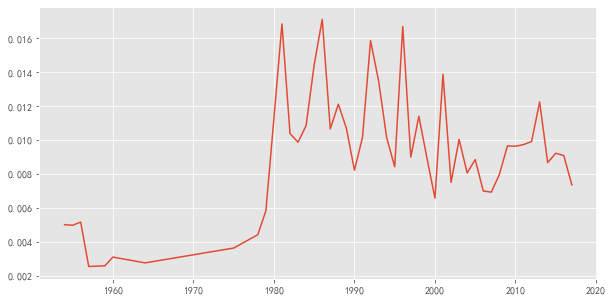

In [39]:
plt.figure(figsize = [10, 5])
plt.plot(df['year'], df['经济']);

In [41]:
def plotEvolution(word, color, linestyle, marker):
    plt.plot(df['year'], df[word], color = color, 
             linestyle=linestyle, marker=marker, label= word)
    plt.legend(loc=2,fontsize=18)
    plt.ylabel(u'相对频数')

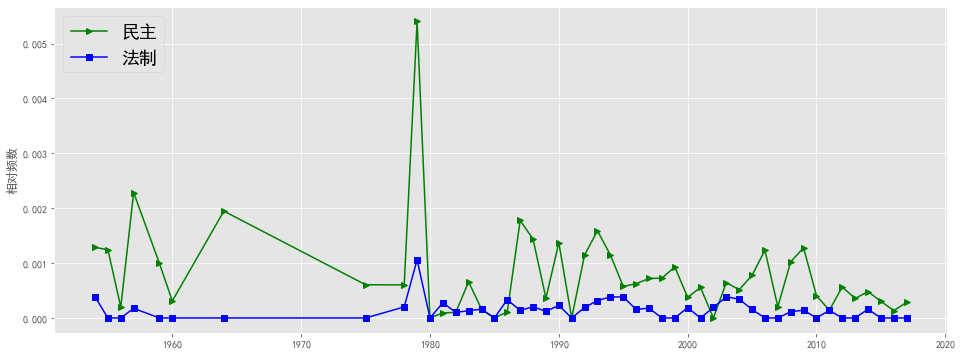

In [42]:
plt.figure(figsize=(16, 6),facecolor='white')
plotEvolution(u'民主', 'g', '-', '>')
plotEvolution(u'法制', 'b', '-', 's')

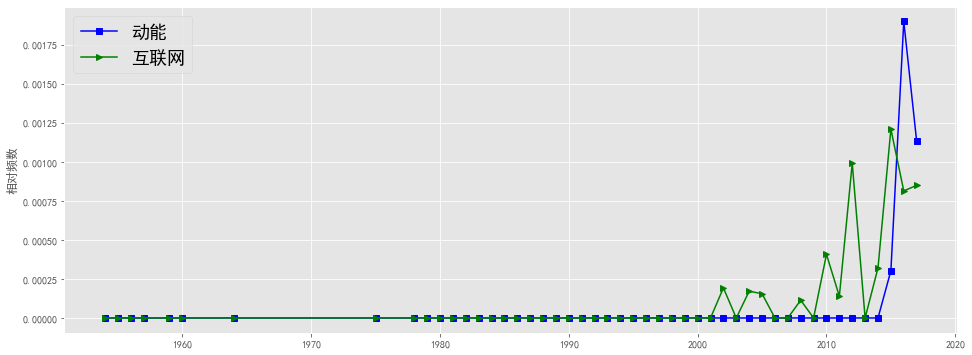

In [43]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'动能', 'b', '-', 's')
plotEvolution(u'互联网', 'g', '-', '>')

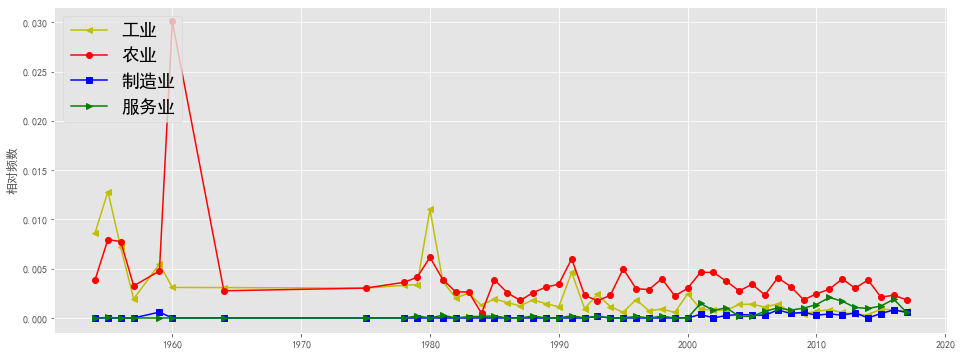

In [44]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'工业', 'y', '-', '<')
plotEvolution(u'农业', 'r', '-', 'o')
plotEvolution(u'制造业', 'b', '-', 's')
plotEvolution(u'服务业', 'g', '-', '>')

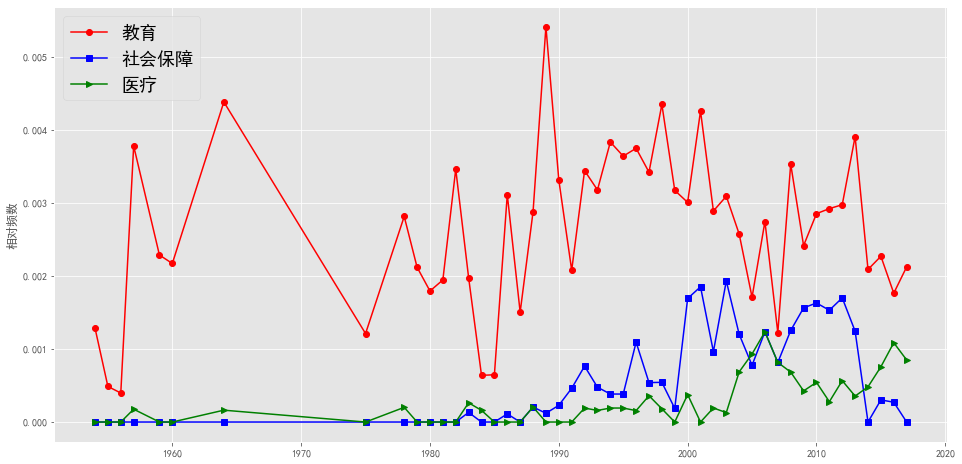

In [45]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'教育', 'r', '-', 'o')
plotEvolution(u'社会保障', 'b', '-', 's')
plotEvolution(u'医疗', 'g', '-', '>')


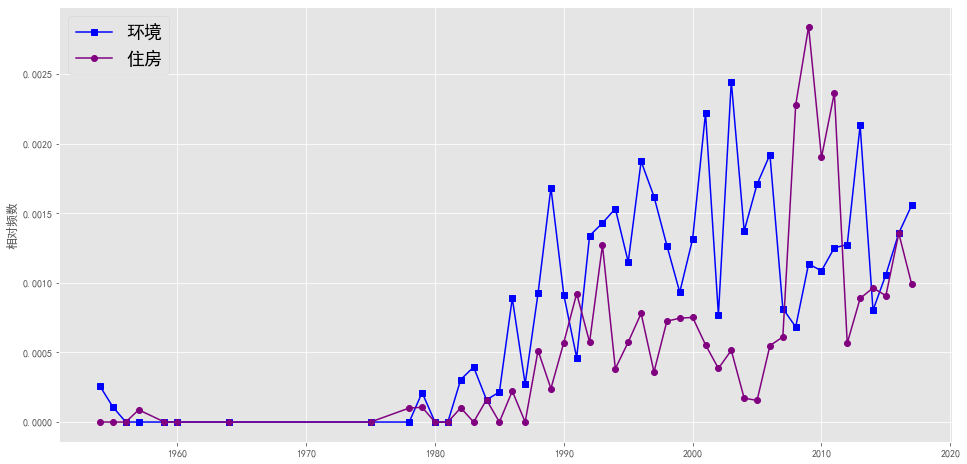

In [46]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'环境', 'b', '-', 's')
plotEvolution(u'住房', 'purple', '-', 'o')

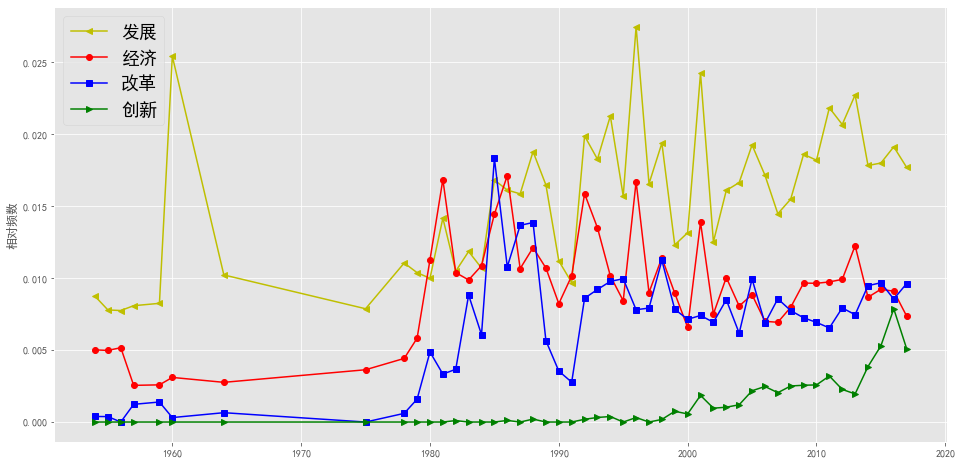

In [47]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'发展', 'y', '-', '<')
plotEvolution(u'经济', 'r', '-', 'o')
plotEvolution(u'改革', 'b', '-', 's')
plotEvolution(u'创新', 'g', '-', '>')

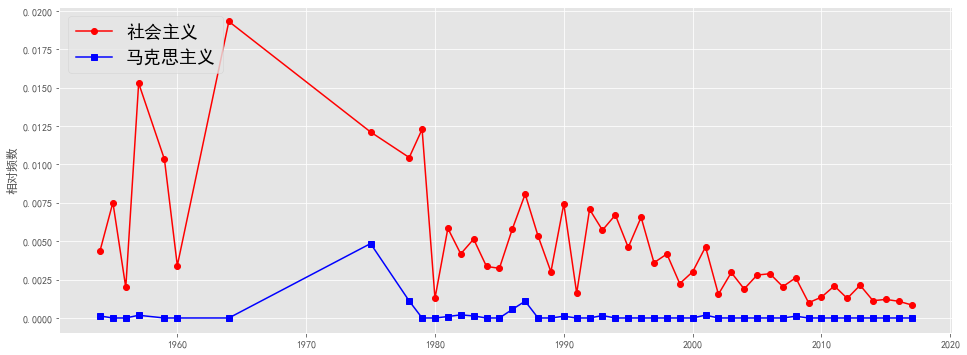

In [48]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'社会主义', 'r', '-', 'o')
plotEvolution(u'马克思主义', 'b', '-', 's')


### 使用TF-IDF来计算


In [49]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

count = CountVectorizer(ngram_range=(1, 1))
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
docs = np.array(report_list)
bag_tfidf = tfidf.fit_transform(count.fit_transform(docs))

In [50]:
import pandas as pd
# Relative Frequency
bt = bag_tfidf.toarray()
df_tfidf = pd.DataFrame(bt, columns = count.get_feature_names())
df_tfidf ['year'] = years
df_tfidf = df_tfidf.sort_values(by=['year'], ascending=False)

In [51]:
def plotEvolution(word, color, linestyle, marker):
    plt.plot(df_tfidf['year'], df_tfidf[word], color = color, 
             linestyle=linestyle, marker=marker, label= word)
    plt.legend(loc=2,fontsize=18)
    plt.ylabel(u'TF-IDF')

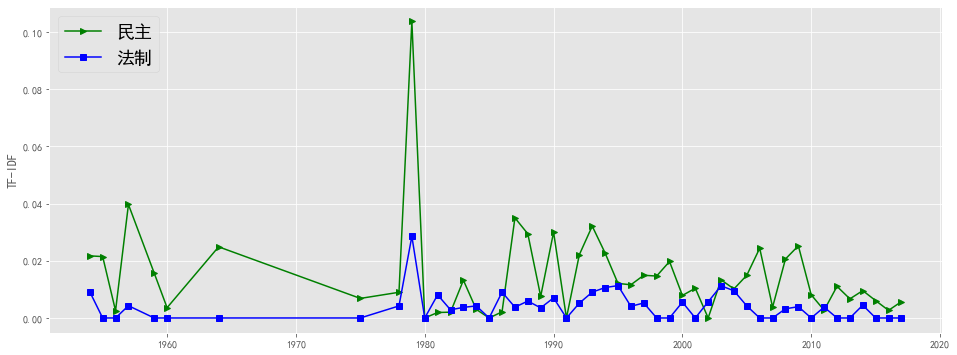

In [52]:
plt.figure(figsize=(16, 6),facecolor='white')
plotEvolution(u'民主', 'g', '-', '>')
plotEvolution(u'法制', 'b', '-', 's')

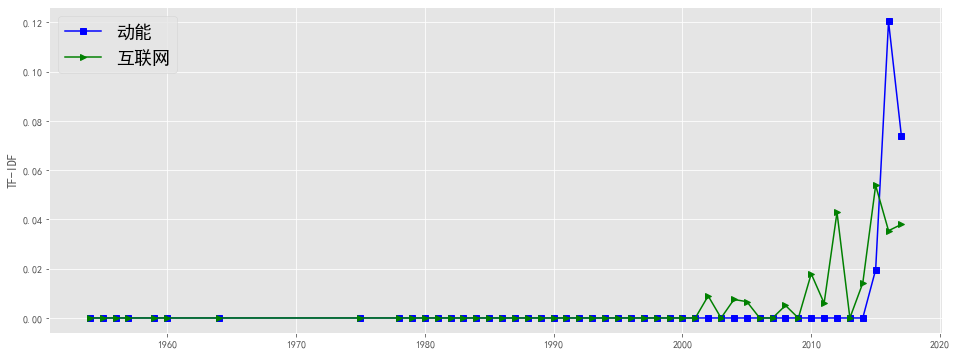

In [53]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'动能', 'b', '-', 's')
plotEvolution(u'互联网', 'g', '-', '>')

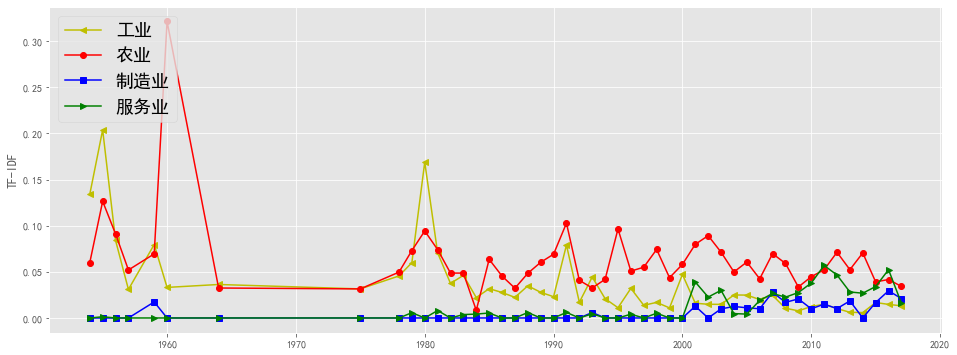

In [54]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'工业', 'y', '-', '<')
plotEvolution(u'农业', 'r', '-', 'o')
plotEvolution(u'制造业', 'b', '-', 's')
plotEvolution(u'服务业', 'g', '-', '>')

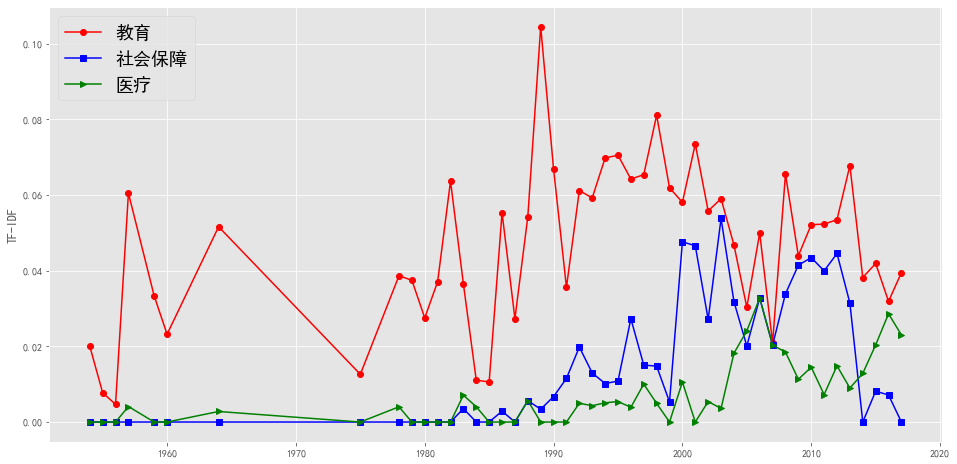

In [55]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'教育', 'r', '-', 'o')
plotEvolution(u'社会保障', 'b', '-', 's')
plotEvolution(u'医疗', 'g', '-', '>')

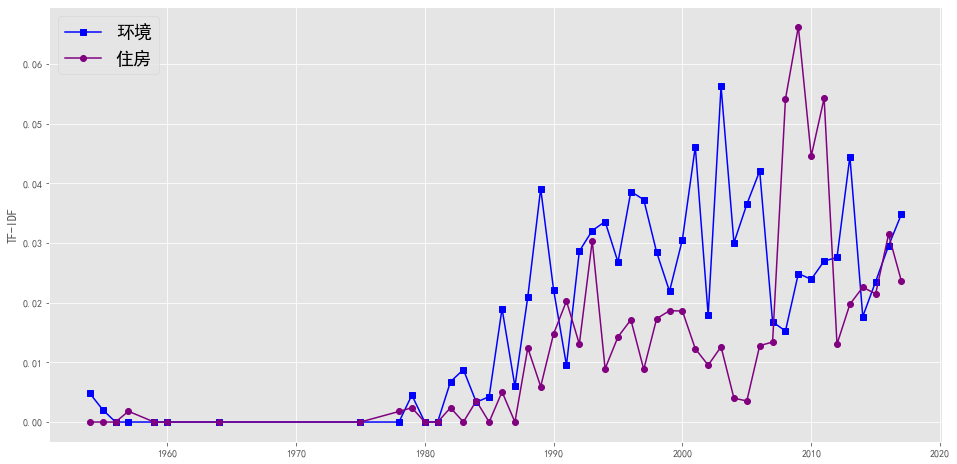

In [56]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'环境', 'b', '-', 's')
plotEvolution(u'住房', 'purple', '-', 'o')

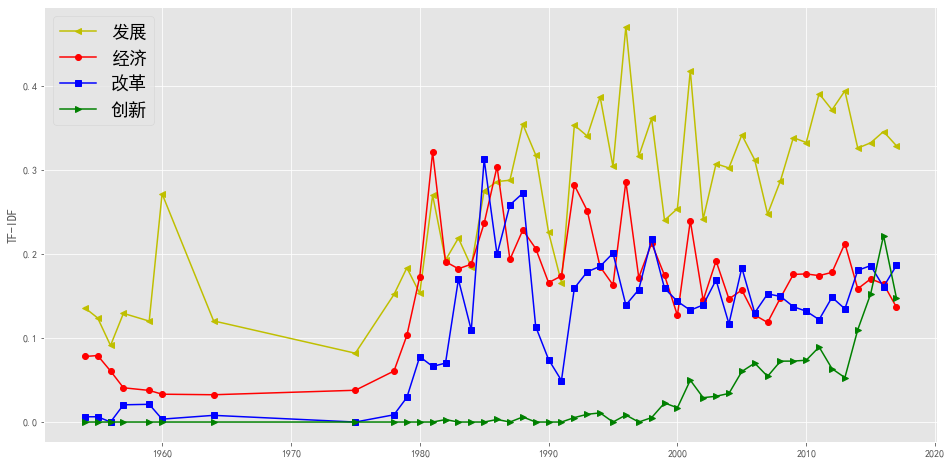

In [57]:
plt.figure(figsize=(16, 8),facecolor='white')

plotEvolution(u'发展', 'y', '-', '<')
plotEvolution(u'经济', 'r', '-', 'o')
plotEvolution(u'改革', 'b', '-', 's')
plotEvolution(u'创新', 'g', '-', '>')

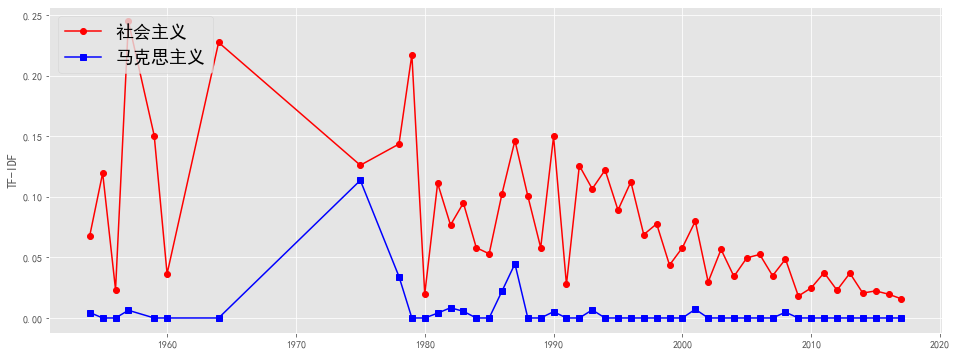

In [58]:
plt.figure(figsize=(16, 6),facecolor='white')

plotEvolution(u'社会主义', 'r', '-', 'o')
plotEvolution(u'马克思主义', 'b', '-', 's')

![image.png](img/chengjun2.png)

## 对2016年政府工作报告建立主题模型

In [118]:
import urllib2
from bs4 import BeautifulSoup
import sys

url2016 = 'http://news.xinhuanet.com/fortune/2016-03/05/c_128775704.htm'
content = urllib2.urlopen(url2016).read()
soup = BeautifulSoup(content) 


In [231]:
gov_report_2016 = [s.text for s in soup('p')]
for i in gov_report_2016[:10]:print i

政府工作报告
——2016年3月5日在第十二届全国人民代表大会第四次会议上
国务院总理 李克强
各位代表：
　　现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协各位委员提出意见。
　　一、2015年工作回顾
　　过去一年，我国发展面临多重困难和严峻挑战。在以习近平同志为总书记的党中央坚强领导下，全国各族人民以坚定的信心和非凡的勇气，攻坚克难，开拓进取，经济社会发展稳中有进、稳中有好，完成了全年主要目标任务，改革开放和社会主义现代化建设取得新的重大成就。
　　——经济运行保持在合理区间。国内生产总值达到67.7万亿元，增长6.9%，在世界主要经济体中位居前列。粮食产量实现"十二连增"，居民消费价格涨幅保持较低水平。特别是就业形势总体稳定，城镇新增就业1312万人，超过全年预期目标，成为经济运行的一大亮点。
　　——结构调整取得积极进展。服务业在国内生产总值中的比重上升到50.5%，首次占据"半壁江山"。消费对经济增长的贡献率达到66.4%。高技术产业和装备制造业增速快于一般工业。单位国内生产总值能耗下降5.6%。
　　——发展新动能加快成长。创新驱动发展战略持续推进，互联网与各行业加速融合，新兴产业快速增长。大众创业、万众创新蓬勃发展，全年新登记注册企业增长21.6%，平均每天新增1.2万户。新动能对稳就业、促升级发挥了突出作用，正在推动经济社会发生深刻变革。


In [232]:
def clean_txt(txt):
    for i in [u'、', u'，', u'—', u'！', u'。', u'《', u'》', u'（', u'）']:
        txt = txt.replace(i, ' ')
    return txt


In [233]:
gov_report_2016 = [clean_txt(i) for i in gov_report_2016]
    

In [234]:
for i in gov_report_2016[:10]:print i

政府工作报告
  2016年3月5日在第十二届全国人民代表大会第四次会议上
国务院总理 李克强
各位代表：
　　现在 我代表国务院 向大会报告政府工作 请予审议 并请全国政协各位委员提出意见 
　　一 2015年工作回顾
　　过去一年 我国发展面临多重困难和严峻挑战 在以习近平同志为总书记的党中央坚强领导下 全国各族人民以坚定的信心和非凡的勇气 攻坚克难 开拓进取 经济社会发展稳中有进 稳中有好 完成了全年主要目标任务 改革开放和社会主义现代化建设取得新的重大成就 
　　  经济运行保持在合理区间 国内生产总值达到67.7万亿元 增长6.9% 在世界主要经济体中位居前列 粮食产量实现"十二连增" 居民消费价格涨幅保持较低水平 特别是就业形势总体稳定 城镇新增就业1312万人 超过全年预期目标 成为经济运行的一大亮点 
　　  结构调整取得积极进展 服务业在国内生产总值中的比重上升到50.5% 首次占据"半壁江山" 消费对经济增长的贡献率达到66.4% 高技术产业和装备制造业增速快于一般工业 单位国内生产总值能耗下降5.6% 
　　  发展新动能加快成长 创新驱动发展战略持续推进 互联网与各行业加速融合 新兴产业快速增长 大众创业 万众创新蓬勃发展 全年新登记注册企业增长21.6% 平均每天新增1.2万户 新动能对稳就业 促升级发挥了突出作用 正在推动经济社会发生深刻变革 


In [227]:
len(gov_report_2016[5:-1])

103

In [243]:
jieba.add_word(u'屠呦呦', freq=None, tag=None)
#del_word(word) 

' '.join(cleancntxt(u'屠呦呦获得了诺贝尔医学奖。', stopwords))

屠呦呦 获得 诺贝尔 医学奖


In [244]:
processed_docs = [cleancntxt(doc, stopwords) for doc in gov_report_2016[5:-1]]
word_count_dict = gensim.corpora.Dictionary(processed_docs)
print "In the corpus there are", len(word_count_dict), "unique tokens"
# word_count_dict.filter_extremes(no_below=5, no_above=0.2) # word must appear >5 times, and no more than 10% documents
# print "After filtering, in the corpus there are only", len(word_count_dict), "unique tokens"
bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]



In the corpus there are 2622 unique tokens


In [245]:
tfidf = models.TfidfModel(bag_of_words_corpus )
corpus_tfidf = tfidf[bag_of_words_corpus ]
lda_model = gensim.models.LdaModel(corpus_tfidf, num_topics=20, id2word=word_count_dict, passes=10)
#lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=word_count_dict, passes=10)

In [246]:
perplexity_list = [inferTopicNumber(bag_of_words_corpus, num, word_count_dict) for num in [5, 15, 20, 25, 30, 35, 40 ]]

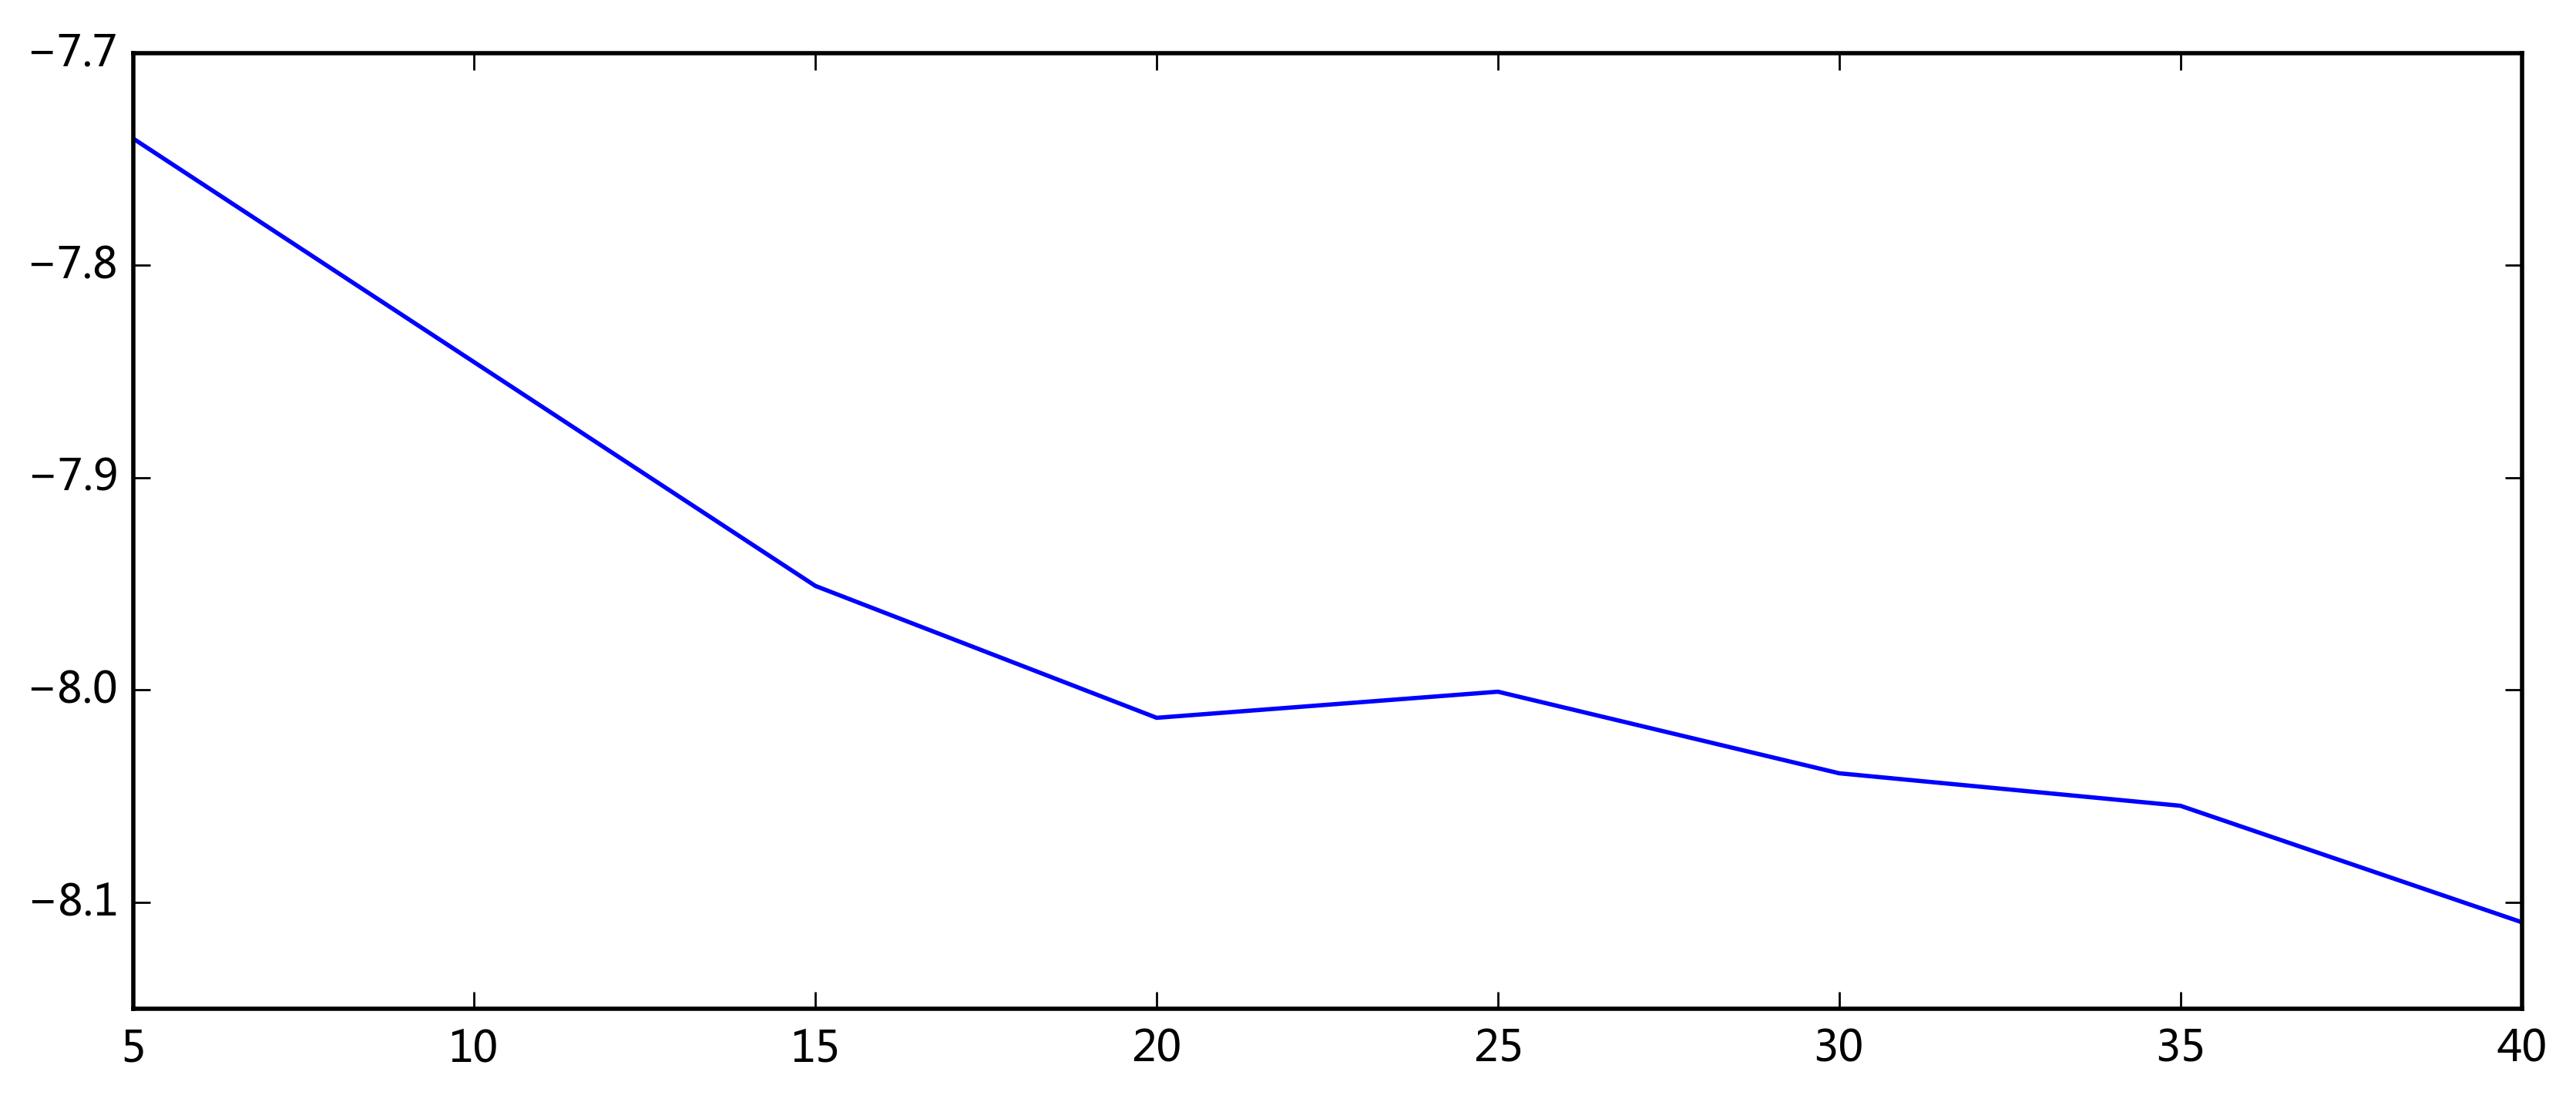

In [247]:
plt.plot([5, 15, 20, 25, 30, 35, 40], perplexity_list)

In [252]:
topictermlist = lda_model.print_topics(-1)
top_words = [[j.split('*')[1] for j in i.split(' + ')] for i in topictermlist] 
for i in top_words: print " ".join(i) + '\n'

2016 重点 供给 增收 结构性 农民 医保 深化 协定 自贸区

就业 燃煤 创业 排放 计划 完成 坚定 重大成就 稳中有进 攻坚克难

基本 就业 宗教 贯彻 发挥 救助 左右 保持 增长 社会

领导人 调控 论坛 峰会 宏观调控 货币政策 区间 联合国 会议 系列

军队 残疾人 大国 利益 社会 国防 妇女 儿童 外交 补贴

回顾 2015 经济 投资 服务 开展 促进 城市 规模 深化

出口 调控 贸易 存量 进口 外贸 安全 遏制 风险 注重

以下 一年 主要 贡献 赢得 富强 奋斗 奋发进取 复兴 民主

审批 万元 动能 结构性 优化 事项 供给 2020 腐败分子 惩处

金融 存在 一些 汇率 规范 适当 支付 债务 科技领域 诺贝尔

需求 大气 生态环境 无穷 自信心 优越性 凝聚力 奋力 展现 巨大

各位 代表 节能 环保 诚挚 表示 感谢 结果 随机 过程

规划 考虑 五年 海洋 国民经济 第十三个 强国 纲要 草案 6.5

港澳 生态 香港 投资 挑战 积累 融资 长期 重大项目 严格

经济 创新 改革 企业 政府 地方 政策 加快 实施 合作

非公有制 财政支出 万公里 教育 里程 范围 水平 所有 学校 品质

民生 脱贫 农业 国有企业 扶贫 世界反法西斯战争 保障 国有资产 市场化 人民

贸易 党风廉政 自贸 经济运行 体制 亿美元 深化改革 对外贸易 出口 形势

八个 两岸 重点 做好 方面 居民 下决心 事关 环境治理 双赢

消费 支付 外商投资 成绩 存款 百分点 旅游 这些 减少 项目



In [249]:
top_words_shares = [[j.split('*')[0] for j in i.split(' + ')] for i in topictermlist] 
top_words_shares = [map(float, i) for i in top_words_shares]
def weightvalue(x):
    return (x - np.min(top_words_shares))*40/(np.max(top_words_shares) -np.min(top_words_shares)) + 10
 
top_words_shares = [map(weightvalue, i) for i in top_words_shares]  

def plotTopics(mintopics, maxtopics):
    num_top_words = 10
    plt.rcParams['figure.figsize'] = (10.0, 4.0)  
    n = 0
    for t in range(mintopics , maxtopics):
        plt.subplot(2, 15, n + 1)  # plot numbering starts with 1
        plt.ylim(0, num_top_words)  # stretch the y-axis to accommodate the words
        plt.xticks([])  # remove x-axis markings ('ticks')
        plt.yticks([]) # remove y-axis markings ('ticks')
        plt.title(u'主题 #{}'.format(t+1), size = 5)
        words = top_words[t][0:num_top_words ]
        words_shares = top_words_shares[t][0:num_top_words ]
        for i, (word, share) in enumerate(zip(words, words_shares)):
            plt.text(0.05, num_top_words-i-0.9, word, fontsize= np.log(share*10))
        n += 1

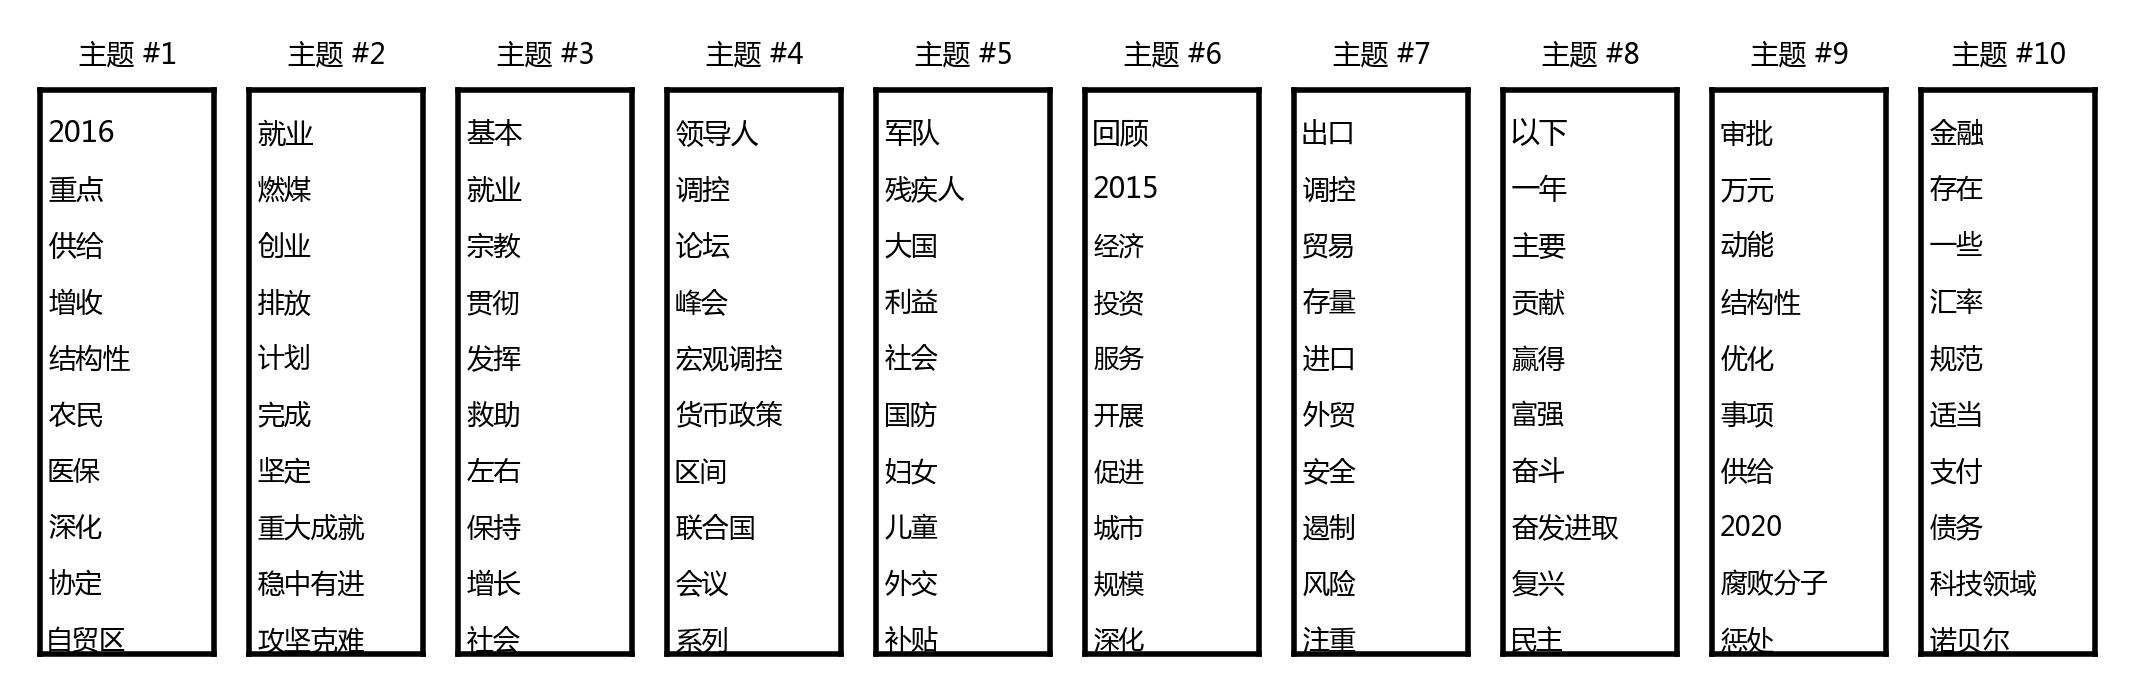

In [250]:
plotTopics(0, 10)


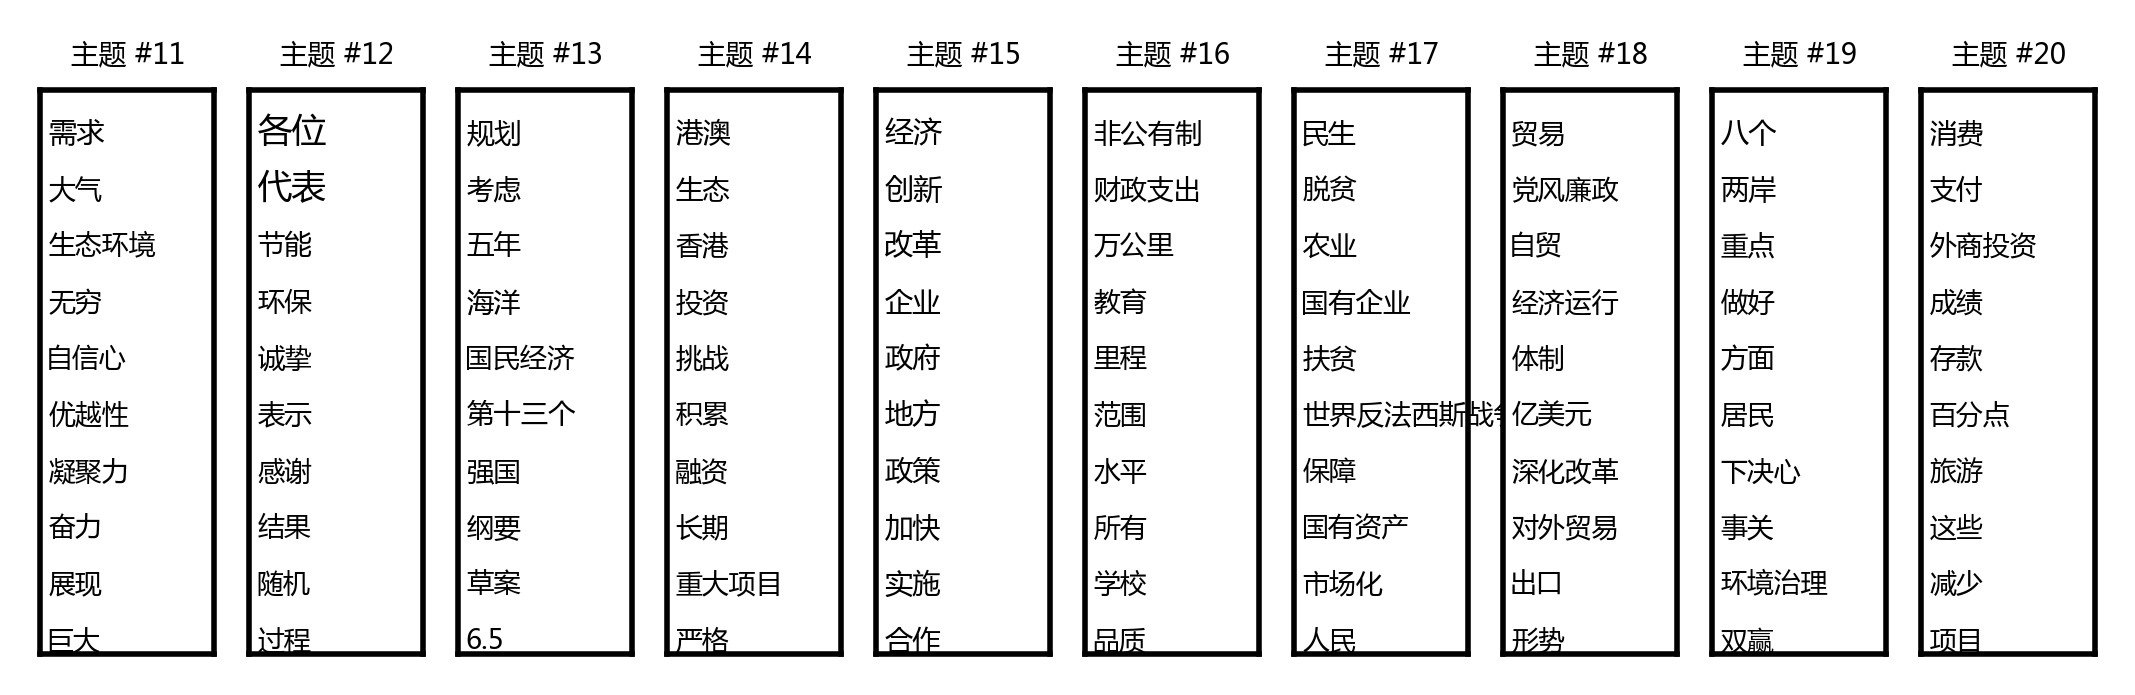

In [251]:
plotTopics(10, 20)